# Import 

In [3]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Dimensionality reduction
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import DBSCAN, KMeans, Birch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Metrics
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report

# Model selection and machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Extraction des données

In [4]:
file_codes = 'EPITA_KANTAR_TP1/fic_epita_kantar_codes.csv'
file_labels = 'EPITA_KANTAR_TP1/fic_epita_kantar_labels.csv'
file_variables = 'EPITA_KANTAR_TP1/variables_fichier.xlsx'

## Data with labels

In [5]:
df_labels = pd.read_csv(file_labels, sep=';', encoding='latin1')
df_labels.head()

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102
0,1,MET20_999999996,2.501255,Yes,No,No,No,Jardin,Entre 201 et 500 m2,NaN,...,Non,4 personnes et plus (rs102>3),Sans enfant (RS11 =0 ),SANS ENFANT (RS11 =0 ),NaN,18-24 ans,PCS + (CODE 1 TO 8 AT RS6),24,0,4
1,2,MET20_98888888,0.722914,Yes,No,No,No,Jardin,Plus de 2000 m2,NaN,...,Non,1 seule personne (RS102=1),Sans enfant (RS11 =0 ),SANS ENFANT (RS11 =0 ),NaN,45-54 ans,PCS + (CODE 1 TO 8 AT RS6),50,0,1
2,3,MET20_1978307,1.039611,Yes,No,No,No,Jardin,Entre 201 et 500 m2,NaN,...,Non,3 personnes (rs102=3),1 seul enfant (RS11=1),AVEC ENFANT (RS11 >0),NaN,35-44 ans,Autres PCS (CODE 9 OR 10 AT RS6),37,1,3
3,4,MET20_1302078,0.976590,Yes,Yes,Yes,No,Jardin,Moins de 200 m2,NaN,...,Non,2 personnes (rs102=2),Sans enfant (RS11 =0 ),SANS ENFANT (RS11 =0 ),NaN,55-64 ans,Inactifs (CODE 3 TO 7 AT RS5),63,0,2
4,5,MET20_1869308,0.812315,No,Yes,No,No,Balcon,NaN,Moins de 10 m2,...,Non,3 personnes (rs102=3),1 seul enfant (RS11=1),AVEC ENFANT (RS11 >0),NaN,35-44 ans,PCS + (CODE 1 TO 8 AT RS6),44,1,3


## Data with codes

In [6]:
df_codes = pd.read_csv(file_codes, sep=';', encoding='latin1')
df_codes.head()

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,NaN,...,2,4,1,2,NaN,1,1,24,0,4
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,NaN,...,2,1,1,2,NaN,4,1,50,0,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,NaN,...,2,3,2,1,NaN,3,2,37,1,3
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,NaN,...,2,2,1,2,NaN,5,3,63,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,NaN,1.0,...,2,3,2,1,NaN,3,1,44,1,3


In [7]:
df_variables = pd.ExcelFile(file_variables)

variables_sheets = df_variables.sheet_names

variables_data = df_variables.parse(variables_sheets[0])
variables_data.head()

,Variable,Label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,A11,A1. Entretien de jardin/terrasse/balcon- Jardin,NaN,NaN,NaN,NaN
1,A12,A1. Entretien de jardin/terrasse/balcon - Balcon,NaN,NaN,NaN,NaN
2,A13,A1. Entretien de jardin/terrasse/balcon - Ter...,NaN,NaN,NaN,Segmentation usages
3,A14,A1. Entretien de jardin/terrasse/balcon - Auc...,NaN,NaN,NaN,NaN
4,A4,A4. TYPE D'ESPACE,NaN,NaN,NaN,NaN


## Separations datas in groups

In [8]:
def Extract_data_codes(columns_to_extract):

    available_columns = df_codes.columns.tolist()

    valid_columns = [col for col in columns_to_extract if col in available_columns]

    extracted_data = df_codes[valid_columns]

    return extracted_data
    
def Extract_data_labels(columns_to_extract):

    available_columns = df_codes.columns.tolist()

    valid_columns = [col for col in columns_to_extract if col in available_columns]

    extracted_data = df_labels[valid_columns]

    return extracted_data

In [9]:
orange_vars = [
    "A9_1_slice", "A9_2_slice", "A9_3_slice", "A9_4_slice", "A9_5_slice",
    "A9_6_slice", "A9_7_slice", "A9_8_slice", "A9_9_slice", "A9_10_slice",
    "A9_11_slice", "A9_12_slice", "A9_13_slice", "A9_14_slice", "A9_15_slice", "A9_16_slice",
    "A10_1_slice", "A10_2_slice", "A10_3_slice", "A10_4_slice", "A10_5_slice",
    "A10_6_slice", "A10_7_slice", "A10_8_slice",
    "A11_1_slice", "A11_2_slice", "A11_3_slice", "A11_4_slice", "A11_5_slice",
    "A11_6_slice", "A11_7_slice", "A11_8_slice", "A11_9_slice", "A11_10_slice",
    "A11_11_slice", "A11_12_slice", "A11_13_slice"
]
orange_data = variables_data[variables_data["Variable"].isin(orange_vars)]

orange_extract = Extract_data_codes(orange_vars)
orange_extract.head()

,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,...,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
2,3,2,2,2,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,1,2,2,2,3,2,3,2,1,2,...,2,1,2,3,3,3,2,2,1,2
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [10]:
green_vars = [
 "A11", "A12", "A13", "A14",
"A4", "A5", "A5bis",
"A8_1_slice", "A8_2_slice", "A8_3_slice", "A8_4_slice",
"B1_1_slice", "B1_2_slice",
"B2_1_slice", "B2_2_slice",
"B3", "B4", "B6", "C1_1_slice",
"C1_2_slice", "C1_3_slice", "C1_4_slice", "C1_5_slice", "C1_6_slice", "C1_7_slice", "C1_8_slice",
"C1_9_slice"
]
green_data = variables_data[variables_data["Variable"].isin(green_vars)]

green_extract = Extract_data_codes(green_vars)
green_extract = green_extract.fillna(0)

green_extract.head()

,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,...,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice
0,1,0,0,0,1,2.0,0.0,2,2,2,...,3,2,2,2,2,2,2,2,2,2
1,1,0,0,0,1,5.0,0.0,2,0,0,...,3,4,4,4,4,4,4,4,4,4
2,1,0,0,0,1,2.0,0.0,5,5,1,...,4,4,4,4,4,4,4,4,4,4
3,1,1,1,0,1,1.0,0.0,2,3,2,...,4,4,4,5,5,5,5,5,4,4
4,0,1,0,0,2,0.0,1.0,1,1,1,...,3,4,4,4,4,4,4,4,4,4


## Normalisation

In [11]:
def normalisation_data(data):
    scaler = MinMaxScaler()
    normalized_data = pd.DataFrame(
        scaler.fit_transform(data),
        columns=data.columns
    )

    return normalized_data

In [12]:
orange_normalized = normalisation_data(orange_extract)
orange_normalized.head()

,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,...,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
2,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
3,0.000000,0.333333,0.333333,0.333333,0.666667,0.333333,0.666667,0.333333,0.000000,0.333333,...,0.333333,0.000000,0.333333,0.666667,0.666667,0.666667,0.333333,0.333333,0.000000,0.333333
4,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


In [13]:
green_normalized = normalisation_data(green_extract)
green_normalized.head()

,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,...,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice
0,1.0,0.0,0.0,0.0,0.0,0.4,0.00,0.04,0.04,0.04,...,0.666667,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
1,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.04,0.00,0.00,...,0.666667,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
2,1.0,0.0,0.0,0.0,0.0,0.4,0.00,0.10,0.10,0.02,...,1.000000,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
3,1.0,1.0,1.0,0.0,0.0,0.2,0.00,0.04,0.06,0.04,...,1.000000,0.75,0.75,1.00,1.00,1.00,1.00,1.00,0.75,0.75
4,0.0,1.0,0.0,0.0,0.5,0.0,0.25,0.02,0.02,0.02,...,0.666667,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75


# I/ Clustering
## Clustering function

In [14]:
def visualize_clusters(data, labels, title="Visualisation des clusters"):
    if isinstance(data, pd.DataFrame):
        data = data.values

    if data.shape[1] > 3:
        pca = PCA(n_components=3)
        data_reduced = pca.fit_transform(data)
    else:
        data_reduced = data

    n_features = data_reduced.shape[1]

    if n_features == 2:
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
        plt.colorbar(scatter, label='Cluster')
        plt.title(title)
        plt.xlabel('Composante 1')
        plt.ylabel('Composante 2')
        plt.show()

    elif n_features == 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(data_reduced[:, 0], data_reduced[:, 1], data_reduced[:, 2], c=labels, cmap='viridis', s=50, alpha=0.8)
        fig.colorbar(scatter, ax=ax, label='Cluster')
        ax.set_title(title)
        ax.set_xlabel('Composante 1')
        ax.set_ylabel('Composante 2')
        ax.set_zlabel('Composante 3')
        plt.show()
    else:
        print("Les données doivent avoir 2 ou 3 dimensions après réduction pour être visualisées.")


def calculate_variance_ratios(data, labels):
    overall_mean = data.mean(axis=0)
    groups = np.unique(labels)

    intra_variance = 0
    inter_variance = 0

    for group in groups:
        group_data = data[labels == group]
        group_mean = group_data.mean(axis=0)

        intra_variance += np.sum((group_data - group_mean) ** 2)

        inter_variance += len(group_data) * np.sum((group_mean - overall_mean) ** 2)

    return intra_variance, inter_variance, inter_variance / intra_variance


def clustering_compare(data):
    print('-----------------------------------------KMEANS-----------------------------------------')
    inertia = []
    silhouette_scores = []
    k_values = range(2, 11)
    variance_ratios = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)

        inertia.append(kmeans.inertia_)
        s_score = silhouette_score(data, labels)
        silhouette_scores.append(s_score)
        intra, inter, ratio = calculate_variance_ratios(data.values, labels)
        variance_ratios.append(ratio)
        print(f'k={k}: Intra-variance={intra}, Inter-variance={inter}, Ratio={ratio:.4f}, silhouette_score={s_score}')

    print('\n')
    print('-----------------------------------------HIERARCHICAL-----------------------------------------')

    linked = linkage(data, method='ward')

    for k in k_values:
        hierarchical_labels = fcluster(linked, t=k, criterion='maxclust')

        s_score = silhouette_score(data, hierarchical_labels)
        intra, inter, ratio = calculate_variance_ratios(data.values, hierarchical_labels)
        print(f'k={k}: Intra-variance={intra}, Inter-variance={inter}, Ratio={ratio:.4f}, silhouette_score={s_score}')

    print('\n')
    print('-----------------------------------------BIRCH-----------------------------------------')
    k_values = range(2, 11)

    for k in k_values:
        birch_model = Birch(n_clusters=k, branching_factor=100, threshold=.5)
        birch_labels = birch_model.fit_predict(data)

        s_score = silhouette_score(data, birch_labels)
        intra, inter, ratio = calculate_variance_ratios(data.values, birch_labels)
        print(f'k={k}: Intra-variance={intra}, Inter-variance={inter}, Ratio={ratio:.4f}, silhouette_score={s_score}')

    print('\n')
    print('-----------------------------------------DBSCAN-----------------------------------------')
    dbscan_model = DBSCAN()
    dbscan_labels = dbscan_model.fit_predict(data)

    # Vérifier si des clusters valides ont été détectés
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Compte les clusters sauf le bruit
    n_noise = np.sum(dbscan_labels == -1)  # Points considérés comme bruit

    print(f"DBSCAN: Nombre de clusters détectés (excluant le bruit) = {n_clusters}")
    print(f"DBSCAN: Nombre de points considérés comme bruit = {n_noise}")

    intra, inter, ratio = calculate_variance_ratios(data.values, dbscan_labels)
    if n_clusters > 1:
        s_score = silhouette_score(data, dbscan_labels)
        print(f'Intra-variance={intra}, Inter-variance={inter}, Ratio={ratio:.4f}, silhouette_score={s_score}')
    else:
        print(f'Intra-variance={intra}, Inter-variance={inter}, Ratio={ratio:.4f}')

## Orange Clustering
### Sans PCA

In [15]:
clustering_compare(orange_normalized)

-----------------------------------------KMEANS-----------------------------------------
k=2: Intra-variance=9910.98044765006, Inter-variance=3173.6445523500024, Ratio=0.3202, silhouette_score=0.19553084581817756
k=3: Intra-variance=8876.570532189206, Inter-variance=4208.054467810777, Ratio=0.4741, silhouette_score=0.14369579237982893
k=4: Intra-variance=8413.11600964935, Inter-variance=4671.508990350638, Ratio=0.5553, silhouette_score=0.1019893422988705
k=5: Intra-variance=8132.595296416288, Inter-variance=4952.029703583692, Ratio=0.6089, silhouette_score=0.09536834327837147
k=6: Intra-variance=7929.7073867856625, Inter-variance=5154.917613214326, Ratio=0.6501, silhouette_score=0.07542876318328406
k=7: Intra-variance=7706.7383816981255, Inter-variance=5377.886618301891, Ratio=0.6978, silhouette_score=0.07374967889113072
k=8: Intra-variance=7552.979373654037, Inter-variance=5531.64562634598, Ratio=0.7324, silhouette_score=0.06801949379225863
k=9: Intra-variance=7447.517091911629, Inter

### Avec PCA

In [16]:
pca = PCA(n_components=3)
orange_pca = pd.DataFrame(pca.fit_transform(orange_normalized), columns=['PC1', 'PC2', 'PC3'])
clustering_compare(orange_pca)

-----------------------------------------KMEANS-----------------------------------------
k=2: Intra-variance=3796.774172388804, Inter-variance=3168.9093533353735, Ratio=0.8346, silhouette_score=0.3683626342676513
k=3: Intra-variance=2768.9528355608163, Inter-variance=4196.730690163359, Ratio=1.5156, silhouette_score=0.3240710275237347
k=4: Intra-variance=2314.3460013083873, Inter-variance=4651.337524415782, Ratio=2.0098, silhouette_score=0.2755768836182122
k=5: Intra-variance=2041.693266231215, Inter-variance=4923.990259492958, Ratio=2.4117, silhouette_score=0.2732255440983693
k=6: Intra-variance=1838.3272206972624, Inter-variance=5127.356305026915, Ratio=2.7891, silhouette_score=0.24726346273068084
k=7: Intra-variance=1630.5197864007462, Inter-variance=5335.163739323429, Ratio=3.2721, silhouette_score=0.25824835246523786
k=8: Intra-variance=1495.5719796602352, Inter-variance=5470.1115460639385, Ratio=3.6575, silhouette_score=0.2605772402935238
k=9: Intra-variance=1364.2923749123443, I

### **Obsevation**

#### **PCA avec ou sans**
Il est évident que tous les résultats obtenus après réduction par PCA sont supérieurs. Par conséquent, nous nous concentrerons uniquement sur l'analyse de ces résultats.

#### **1. K-means**
- **Points forts** :
  - Le ratio inter/intra augmente régulièrement avec \(k\), indiquant une meilleure séparation des clusters.
  - Les ratios sont les plus élevés parmi toutes les méthodes.
- **Points faibles** :
  - L'indice de silhouette diminue progressivement avec \(k\), surtout pour \(k > 3\), indiquant une baisse de la cohésion intra-cluster.
- **Observation notable** :
  - \(k=3\) semble être un bon compromis avec un ratio de **1.5156** et un indice de silhouette relativement correct (\(0.324\)).

---

#### **2. Clustering Hiérarchique**
- **Points forts** :
  - Suit un schéma similaire à K-means, avec un ratio inter/intra qui augmente et des indices de silhouette décroissants.
- **Points faibles** :
  - Les ratios sont plus faibles que ceux de K-means.
  - Les indices de silhouette chutent rapidement après \(k=3\), indiquant des clusters moins bien définis.
- **Observation notable** :
  - Le meilleur compromis semble être \(k=3\) (\(ratio = 1.3204\), \(silhouette = 0.295\)), bien qu'il soit légèrement inférieur à K-means.

---

#### **3. BIRCH**
- **Points forts** :
  - Comportement similaire au clustering hiérarchique, avec des ratios légèrement plus élevés que la méthode hiérarchique.
- **Points faibles** :
  - Les indices de silhouette diminuent après \(k=3\) et restent faibles au-delà.
- **Observation notable** :
  - Le meilleur compromis est \(k=3\) (\(ratio = 1.3264\), \(silhouette = 0.305\)).

---

#### **4. DBSCAN**
- **Points faibles** :
  - Ne détecte qu'un seul cluster (hors bruit), ce qui est insuffisant pour une segmentation utile.
- **Observation notable** :
  - Cette méthode n'est pas adaptée dans ce cas, probablement parce que vos données ne présentent pas une densité suffisante pour DBSCAN.

---

#### **Comparaison des Méthodes**

| Méthode           | \(k\) | Ratio inter/intra | Silhouette |
|-------------------|-------|-------------------|------------|
| **K-means**       | 3     | 1.5156            | 0.324      |
| **Hiérarchique**  | 3     | 1.3204            | 0.295      |
| **BIRCH**         | 3     | 1.3264            | 0.305      |
| **DBSCAN**        | -     | 0.0002            | Non applicable |

---

#### **Choix**

1. **Méthode** : **K-means** est globalement la meilleure méthode ici, car elle offre :
   - Les meilleurs ratios inter/intra, indiquant une bonne séparation des clusters.
   - Un indice de silhouette raisonnable pour \(k=3\).

2. **Nombre de clusters (\(k\))** :
   - **\(k=3\)** est le meilleur compromis entre un ratio acceptable (**1.5156**) et un indice de silhouette correct (**0.324**).
   - Si on souhaite privilégier une meilleure séparation au détriment de la cohésion, on pourai envisager \(k=4\) ou \(k=5\).

---

#### **Conclusion**

- **Méthode choisie** : K-means.
- **Paramètre optimal** : \(k=3\), car il équilibre bien le ratio et l'indice de silhouette.
- **Raisonnement** :
  - Le ratio inter/intra est raisonnable, ce qui signifie une séparation acceptable.
  - L'indice de silhouette est toujours positif (\(0.324\)), indiquant que les clusters sont bien formés.

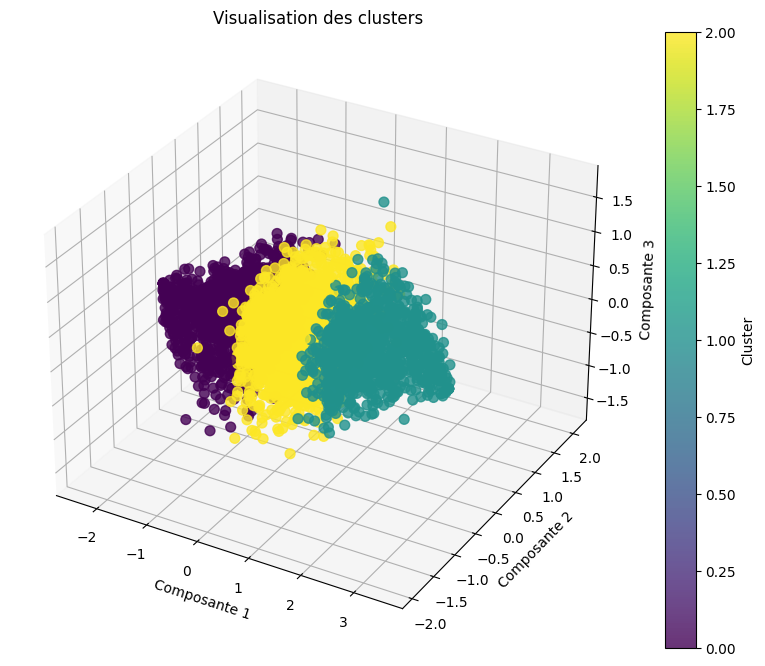

In [17]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
orange_labels = kmeans.fit_predict(orange_pca)
visualize_clusters(orange_pca, orange_labels)

In [18]:
df_analysis = df_labels.copy()
df_analysis['Cluster'] = orange_labels
section = ['Cluster', 'A11_10_slice', 'A11_7_slice', 'A11_13_slice', 'A11_5_slice', 'A9_8_slice', 'A9_4_slice', 'A11_8_slice', 'A11_11_slice',
'A9_3_slice', 'A11_3_slice', 'A9_14_slice', 'A9_7_slice', 'A9_2_slice', 'A9_1_slice','A10_5_slice']
df_analysis = df_analysis[section]

summary = df_analysis.groupby('Cluster').agg({
    col: lambda x: x.value_counts().idxmax() for col in section  # Calculer le mode (valeur la plus fréquente)
})

print(summary)

         Cluster           A11_10_slice            A11_7_slice  \
Cluster                                                          
0              0  Tout à  fait d accord  Tout à  fait d accord   
1              1    Plutôt pas d accord    Plutôt pas d accord   
2              2        Plutôt d accord        Plutôt d accord   

                  A11_13_slice            A11_5_slice           A9_8_slice  \
Cluster                                                                      
0        Tout à  fait d accord  Tout à  fait d accord      Plutôt d accord   
1          Plutôt pas d accord        Plutôt d accord  Plutôt pas d accord   
2              Plutôt d accord        Plutôt d accord      Plutôt d accord   

                   A9_4_slice            A11_8_slice           A11_11_slice  \
Cluster                                                                       
0             Plutôt d accord  Tout à  fait d accord  Tout à  fait d accord   
1        Pas du tout d accord    Plutôt p

## Green Clustering
### Sans PCA

In [19]:
clustering_compare(green_normalized)

-----------------------------------------KMEANS-----------------------------------------
k=2: Intra-variance=7928.457411646903, Inter-variance=1342.9144994419844, Ratio=0.1694, silhouette_score=0.1751371659900995
k=3: Intra-variance=6387.08940915437, Inter-variance=2884.282501934518, Ratio=0.4516, silhouette_score=0.21850514095865928
k=4: Intra-variance=5526.726701197886, Inter-variance=3744.645209891002, Ratio=0.6776, silhouette_score=0.22725132118551492
k=5: Intra-variance=5217.8109030234355, Inter-variance=4053.561008065443, Ratio=0.7769, silhouette_score=0.17296241643676116
k=6: Intra-variance=4530.981711312863, Inter-variance=4740.3901997760195, Ratio=1.0462, silhouette_score=0.21680407154914164
k=7: Intra-variance=4392.503316564813, Inter-variance=4878.86859452407, Ratio=1.1107, silhouette_score=0.21777289556858082
k=8: Intra-variance=4207.183865500904, Inter-variance=5064.188045587978, Ratio=1.2037, silhouette_score=0.2077941008730856
k=9: Intra-variance=4060.2192695660324, Inte

### Avec PCA

In [20]:
pca = PCA(n_components=3)
green_pca = pd.DataFrame(pca.fit_transform(green_normalized), columns=['PC1', 'PC2', 'PC3'])
clustering_compare(green_pca)

-----------------------------------------KMEANS-----------------------------------------
k=2: Intra-variance=3583.2794436324475, Inter-variance=1936.0286231696182, Ratio=0.5403, silhouette_score=0.4367843953234821
k=3: Intra-variance=2569.585940261863, Inter-variance=2949.7221265401995, Ratio=1.1479, silhouette_score=0.4311116822373886
k=4: Intra-variance=1940.9302640958874, Inter-variance=3578.3778027061726, Ratio=1.8436, silhouette_score=0.46990369592126147
k=5: Intra-variance=1376.0842131710642, Inter-variance=4143.223853630998, Ratio=3.0109, silhouette_score=0.491124891798763
k=6: Intra-variance=1107.1439496947391, Inter-variance=4412.1641171073215, Ratio=3.9852, silhouette_score=0.4834385007642661
k=7: Intra-variance=945.8701913103791, Inter-variance=4573.437875491681, Ratio=4.8352, silhouette_score=0.4852454127323818
k=8: Intra-variance=837.1121918571098, Inter-variance=4682.1958749449495, Ratio=5.5933, silhouette_score=0.4858010767580692
k=9: Intra-variance=727.1555347123203, In

### **Obsevation**

#### **PCA avec ou sans**
Il est évident que tous les résultats obtenus après réduction par PCA sont supérieurs. Par conséquent, nous nous concentrerons uniquement sur l'analyse de ces résultats.

#### **1. K-means**
- **Points forts** :
  - Le ratio inter/intra augmente régulièrement avec \(k\), atteignant des valeurs élevées (\(> 7\) pour \(k=10\)).
  - L'indice de silhouette reste relativement stable, avec des valeurs maximales autour de \(k=5\) (\(0.4911\)).
- **Points faibles** :
  - Pour des valeurs élevées de \(k\) (\(k=9\) ou \(k=10\)), l'indice de silhouette diminue légèrement, indiquant une perte de cohésion intra-cluster.
- **Observation notable** :
  - \(k=5\) semble être le meilleur compromis avec un ratio inter/intra élevé (\(3.0109\)) et un indice de silhouette maximal (\(0.4911\)).

---

#### **2. Clustering Hiérarchique**
- **Points forts** :
  - Le ratio inter/intra suit un schéma similaire à K-means, augmentant régulièrement avec \(k\) (\(> 6\) pour \(k=10\)).
  - Les indices de silhouette sont compétitifs, atteignant un maximum autour de \(k=4\) (\(0.4705\)).
- **Points faibles** :
  - Pour \(k > 6\), l'indice de silhouette diminue légèrement (\(< 0.47\)), reflétant une baisse de cohésion.
- **Observation notable** :
  - \(k=4\) semble être un bon équilibre avec un ratio (\(1.5323\)) et un indice de silhouette élevé (\(0.4705\)).

---

#### **3. BIRCH**
- **Points forts** :
  - Les ratios inter/intra augmentent progressivement avec \(k\), mais restent inférieurs à ceux de K-means et du clustering hiérarchique.
  - Les indices de silhouette sont relativement bons, atteignant un maximum autour de \(k=6\) (\(0.4508\)).
- **Points faibles** :
  - Les ratios inter/intra sont significativement plus bas que ceux de K-means pour les mêmes valeurs de \(k\).
- **Observation notable** :
  - \(k=6\) offre un compromis raisonnable avec un ratio (\(2.0966\)) et un indice de silhouette relativement élevé (\(0.4508\)).

---

#### **4. DBSCAN**
- **Points faibles** :
  - Ne détecte que 2 clusters, ce qui limite son utilité pour ce jeu de données.
  - Le ratio inter/intra est très faible (\(0.3271\)), indiquant une séparation insuffisante entre les clusters.
- **Observation notable** :
  - Cette méthode n'est pas adaptée pour ce jeu de données, bien que l'indice de silhouette soit acceptable (\(0.3047\)).

---

#### **Comparaison des Méthodes**

| Méthode           | \(k\) | Ratio inter/intra | Silhouette |
|-------------------|-------|-------------------|------------|
| **K-means**       | 5     | 3.0109            | 0.4911     |
| **Hiérarchique**  | 4     | 1.5323            | 0.4705     |
| **BIRCH**         | 6     | 2.0966            | 0.4508     |
| **DBSCAN**        | -     | 0.3271            | 0.3047     |

---

#### **Choix**

1. **Méthode** : **K-means** est la méthode la plus performante ici, grâce à :
   - Les meilleurs ratios inter/intra, reflétant une excellente séparation entre les clusters.
   - L'indice de silhouette le plus élevé, indiquant une bonne cohésion intra-cluster.

2. **Nombre de clusters (\(k\))** :
   - **\(k=5\)** offre le meilleur compromis avec un ratio inter/intra élevé (\(3.0109\)) et l'indice de silhouette le plus élevé (\(0.4911\)).

---

#### **Conclusion**

- **Méthode choisie** : K-means.
- **Paramètre optimal** : \(k=5\), car il équilibre bien la cohésion intra-cluster et la séparation inter-cluster.
- **Raisonnement** :
  - Le ratio inter/intra est significativement élevé, reflétant des clusters bien séparés.
  - L'indice de silhouette maximal (\(0.4911\)) garantit des clusters bien formés.

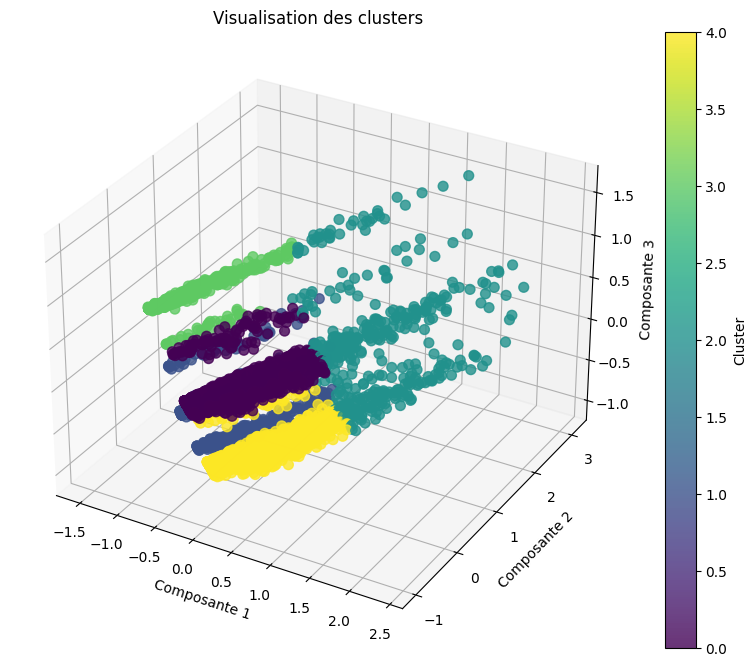

In [21]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
green_labels = kmeans.fit_predict(green_pca)
visualize_clusters(green_pca, green_labels)

In [22]:
df_analysis = df_labels.copy()
df_analysis['Cluster'] = green_labels
section = ['Cluster', 'A13', 'A4', 'A5bis', 'A5', 'A11', 'A12', 'C1_4_slice', 'C1_7_slice', 'C1_6_slice']
df_analysis = df_analysis[section]

summary = df_analysis.groupby('Cluster').agg({
    'A13': lambda x: x.value_counts().idxmax(),            # Mode
    'A4': lambda x: x.value_counts().idxmax(),             # Mode
    'A5bis': lambda x: x.value_counts().idxmax() if x.notnull().any() else None,  # Mode avec gestion des NaN
    'A5': lambda x: x.value_counts().idxmax() if x.notnull().any() else None,     # Mode avec gestion des NaN
    'A11': lambda x: x.value_counts().idxmax(),            # Mode
    'A12': lambda x: x.value_counts().idxmax(),            # Mode
    'C1_4_slice': lambda x: x.value_counts().idxmax(),     # Mode
    'C1_7_slice': lambda x: x.value_counts().idxmax(),     # Mode
    'C1_6_slice': lambda x: x.value_counts().idxmax()      # Mode
})

print(summary)

         A13        A4              A5bis                   A5  A11  A12  \
Cluster                                                                    
0         No    Jardin     Moins de 10 m2      Moins de 200 m2  Yes   No   
1        Yes  Terrasse  Entre 11 et 20 m2                 None   No   No   
2        Yes    Jardin  Entre 11 et 20 m2      Moins de 200 m2  Yes   No   
3         No    Balcon     Moins de 10 m2                 None   No  Yes   
4        Yes    Jardin     Moins de 10 m2  Entre 201 et 500 m2  Yes   No   

                         C1_4_slice                  C1_7_slice  \
Cluster                                                           
0                            Jamais                      Jamais   
1                            Jamais                      Jamais   
2        Une à  trois fois par mois  Une à  trois fois par mois   
3                            Jamais                      Jamais   
4                            Jamais                      Jamais  

# 2/ Réaffectation des individus dans les groupes avec variables actives
## Creation model

In [23]:
def variable_importance(data_normalized, data_labels, verbose=True):
    X = data_normalized
    y = data_labels

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    # --------------------------- ACCURACY ---------------------------#
    accuracy = accuracy_score(y_test, y_pred)
    if verbose:
        print(f"Précision (%): {accuracy * 100:.2f}")

    # ----------------------- CONFUSION MATRIX -----------------------#
    cm = confusion_matrix(y_test, y_pred)
    if verbose:
        print("Matrice de confusion:")
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
    
    # --------------------- CLASSIFICATION REPORT ---------------------#
    if verbose:
        print("Rapport de classification:")
        print(classification_report(y_test, y_pred))

    feature_importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Variable': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    importance_df['Taux d\'implication (%)'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100

    return model, importance_df, accuracy


## Orange

Précision (%): 95.40
Matrice de confusion:


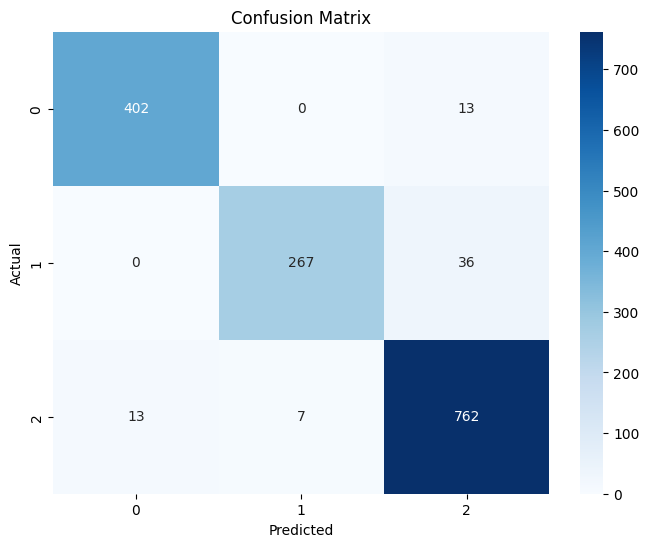

Rapport de classification:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       415
           1       0.97      0.88      0.93       303
           2       0.94      0.97      0.96       782

    accuracy                           0.95      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.95      0.95      0.95      1500



In [24]:
model, importance_df, acc = variable_importance(orange_normalized, orange_labels)

FEATUER IMPORTANCE

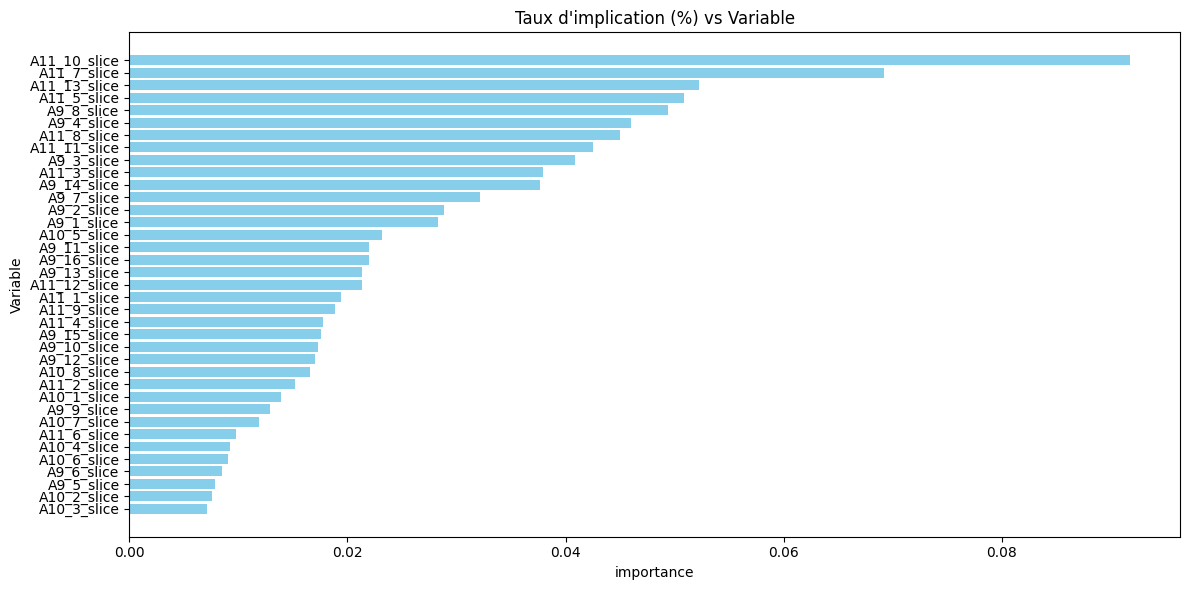

In [25]:
# importance_df[:15]
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Variable'], importance_df["Importance"], color='skyblue')
plt.xlabel("importance")
plt.ylabel("Variable")
plt.title("Taux d'implication (%) vs Variable")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

REGARDONS LEUR IMPACT SUR LE MODEL

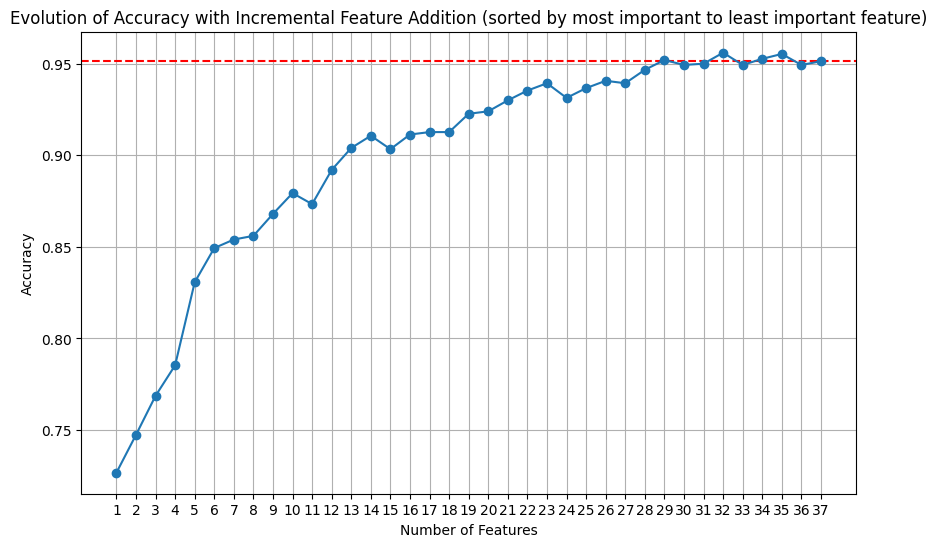

In [26]:
import matplotlib.pyplot as plt

selected_features = pd.DataFrame()
accuracies = []

sorted_features = importance_df.sort_values(by='Importance', ascending=False)['Variable']

for i, feature in enumerate(sorted_features):
    selected_features[feature] = orange_normalized[feature]
    _, _, acc = variable_importance(selected_features, orange_labels, verbose=False)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.axhline(y=acc, color='red', linestyle='--', label=f'Accuracy = {acc:.2f}')
plt.plot(range(1, len(sorted_features) + 1), accuracies, marker='o')
plt.title("Evolution of Accuracy with Incremental Feature Addition (sorted by most important to least important feature)")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()


### Analyse des Résultats

#### 1. Performance Globale
- **Précision** : **95.40 %** – très bonne capacité de réaffectation.
- **Classe 1** : Légèrement plus d'erreurs avec un **recall** de 88 %, tandis que les classes 0 et 2 ont des performances excellentes (recall > 97 %).

#### 2. Matrice de Confusion
- **Classe 0** : 402 correctement classés, 13 erreurs.
- **Classe 1** : 267 correctement classés, 36 erreurs.
- **Classe 2** : 762 correctement classés, 13 erreurs.

#### 3. Importance des Variables
- Les **5 variables les plus influentes** représentent **30.5 %** du total :
  - `A11_10_slice` (9.17 %), `A11_7_slice` (6.92 %), `A11_13_slice` (5.22 %), `A11_5_slice` (5.08 %), `A9_8_slice` (4.94 %).
- Les **10 premières variables** capturent environ **60 %** de l'importance totale, ce qui indique qu’un modèle simplifié avec ces variables serait efficace.

#### 4. Recommandations
- **Améliorer la classe 1** : Identifier des variables spécifiques pour réduire les erreurs.
- **Réduction des variables** : Conserver les **10 à 15 premières variables** pour simplifier le modèle sans sacrifier la précision.


## Green

Précision (%): 98.07
Matrice de confusion:


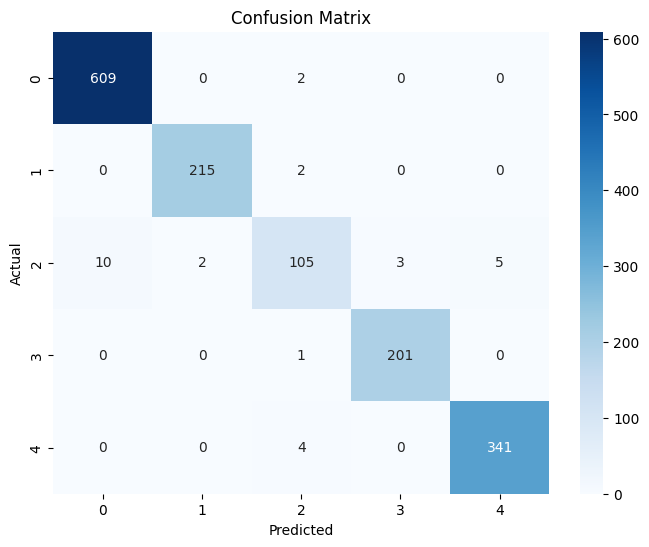

Rapport de classification:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       611
           1       0.99      0.99      0.99       217
           2       0.92      0.84      0.88       125
           3       0.99      1.00      0.99       202
           4       0.99      0.99      0.99       345

    accuracy                           0.98      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



In [27]:
model, importance_df, acc = variable_importance(green_normalized, green_labels)

IMPORTANCE

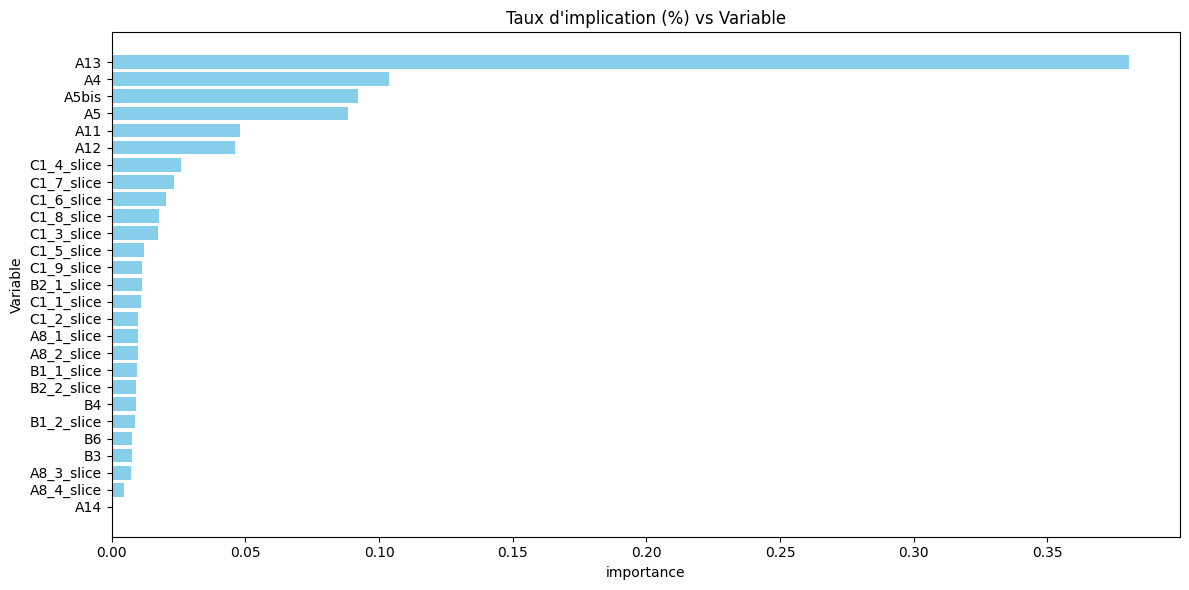

In [28]:
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Variable'], importance_df["Importance"], color='skyblue')
plt.xlabel("importance")
plt.ylabel("Variable")
plt.title("Taux d'implication (%) vs Variable")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

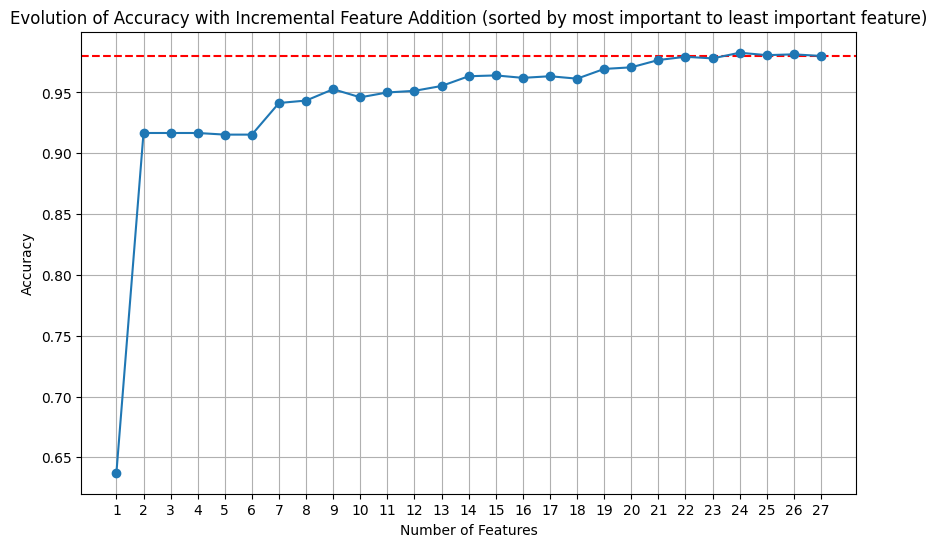

In [29]:
import matplotlib.pyplot as plt

selected_features = pd.DataFrame()
accuracies = []

sorted_features = importance_df.sort_values(by='Importance', ascending=False)['Variable']

for i, feature in enumerate(sorted_features):
    selected_features[feature] = green_normalized[feature]
    _, _, acc = variable_importance(selected_features, green_labels, verbose=False)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.axhline(y=acc, color='red', linestyle='--', label=f'Accuracy = {acc:.2f}')
plt.plot(range(1, len(sorted_features) + 1), accuracies, marker='o')
plt.title("Evolution of Accuracy with Incremental Feature Addition (sorted by most important to least important feature)")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

### Analyse des Résultats

#### 1. Performance Globale
- **Précision** : **98.00 %** – excellente capacité de réaffectation.
- **Classe 3** : Légèrement plus d'erreurs, avec un **recall** de 85 % et une **précision** de 91 %, tandis que les autres classes dépassent 98 % en F1-score.

#### 2. Matrice de Confusion
- **Classe 0, 1, 2, 4** : Très bien classées avec peu d'erreurs (<5 individus mal classés).
- **Classe 3** : Plus d'erreurs (9 mal attribués dans d'autres classes).

#### 3. Importance des Variables
- **Top 5 variables influentes** (65.49 % du total) :
  - `A13` (39.75 %), `A11` (9.86 %), `A4` (7.14 %), `A5bis` (6.70 %), `A5` (6.04 %).
- **Variables secondaires** (5 à 10 %) :
  - Incluent des variables comme `A12` (5.46 %) et `C1_4_slice` (2.47 %).
- **Contribution concentrée** : Les **6 premières variables** capturent près de **75 %** de l'implication totale.

#### 4. Recommandations
- **Améliorer la classe 3** : Identifier des variables supplémentaires ou spécifiques pour mieux la différencier.
- **Réduction des variables** : Un modèle avec les **10 à 15 premières variables** (représentant ~85 % de l'importance) serait suffisant pour maintenir de hautes performances.


# 3 - Détermination d'algorithme de machine learning pour prédire le cluster d'un nouveau consommateur en fonction d'un set de variables (usages en fonctions des attitudes et inversement)
## Definition du modèle

In [30]:
def model_predict_different_data(data, labels):
    X = data
    y = labels

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Précision (%): {accuracy * 100:.2f}")

    cm = confusion_matrix(y_test, y_pred)
    print("Matrice de confusion:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

    return model


## Extraction des autres datas

## Green data entrainée sur le orange clustering

In [35]:
other_vars = [
    'rs3', 'rs5', 'rs6', 'RS1', 'RS191', 'RS192', 'RS193',
    'RS102RECAP', 'rs11recap2', 'RS11recap', 'RS193bis',
    'RS2Recap', 'RS56Recap', 'RS2', 'RS11', 'RS102'
]

other_extract = Extract_data_codes(other_vars)
other_extract = green_extract.fillna(0)


Précision (%): 64.27
Matrice de confusion:


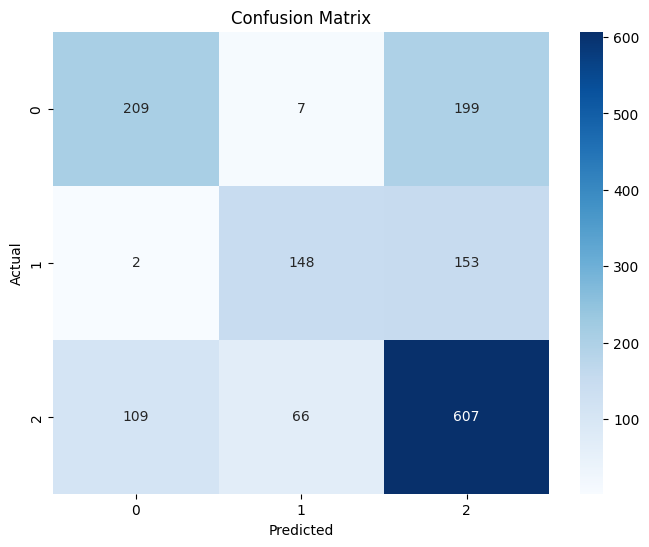

Rapport de classification:
              precision    recall  f1-score   support

           0       0.65      0.50      0.57       415
           1       0.67      0.49      0.56       303
           2       0.63      0.78      0.70       782

    accuracy                           0.64      1500
   macro avg       0.65      0.59      0.61      1500
weighted avg       0.65      0.64      0.63      1500



In [36]:
model_green_in_orange = model_predict_different_data(green_extract, orange_labels)

### Analyse des Résultats : Green Data sur Orange Clustering

- **Précision globale** : **64.27 %** – performances moyennes.
- **Classe 2** : La meilleure (78 % de rappel), mais erreurs fréquentes dans 0 et 1.
- **Classes 0 et 1** : Difficultés à les séparer (50 % et 49 % de rappel).

### Recommandations
- Améliorer la séparation des classes 0 et 1.
- Tester d'autres modèles ou ajuster les paramètres.


## Other data entrainée sur le orange clustering

Précision (%): 64.27
Matrice de confusion:


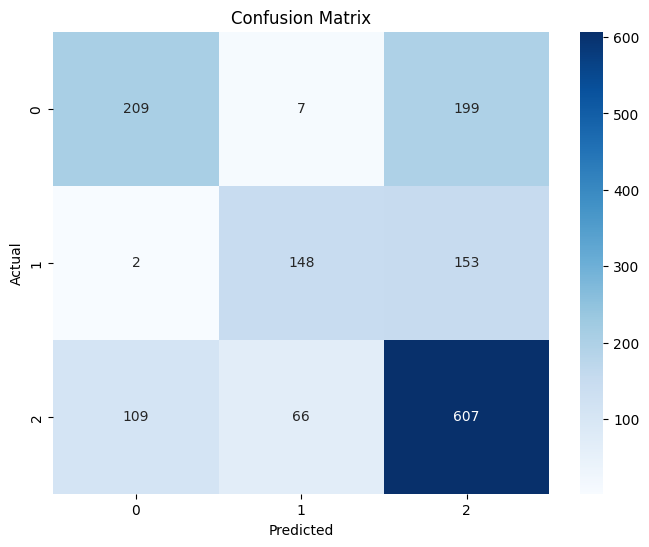

Rapport de classification:
              precision    recall  f1-score   support

           0       0.65      0.50      0.57       415
           1       0.67      0.49      0.56       303
           2       0.63      0.78      0.70       782

    accuracy                           0.64      1500
   macro avg       0.65      0.59      0.61      1500
weighted avg       0.65      0.64      0.63      1500



In [37]:
model_other_in_orange = model_predict_different_data(other_extract, orange_labels)

### Analyse des Résultats : Other Data sur Orange Clustering

- **Précision globale** : **64.27 %** – performances moyennes.
- **Classe 2** : Meilleure performance (78 % de rappel), erreurs fréquentes dans 0 et 1.
- **Classes 0 et 1** : Rappel faible (50 % et 49 %), séparation difficile.

### Recommandations
- Renforcer la séparation des classes 0 et 1.
- Envisager des modèles ou paramètres plus adaptés.


## Orange data entrainée sur le green clustering

Précision (%): 44.20
Matrice de confusion:


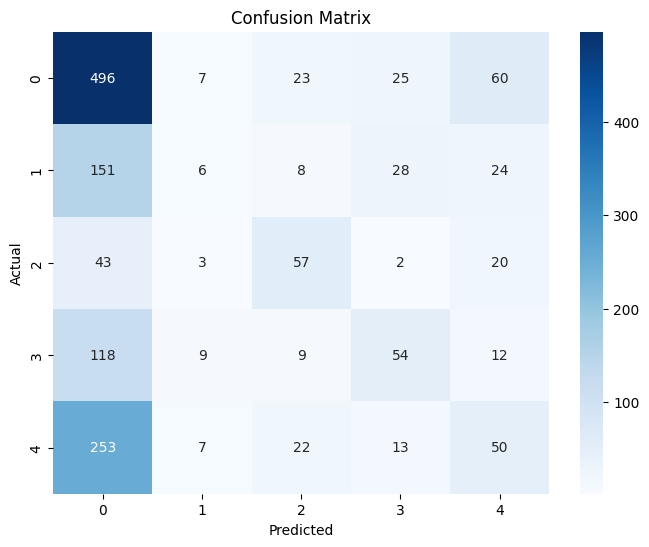

Rapport de classification:
              precision    recall  f1-score   support

           0       0.47      0.81      0.59       611
           1       0.19      0.03      0.05       217
           2       0.48      0.46      0.47       125
           3       0.44      0.27      0.33       202
           4       0.30      0.14      0.20       345

    accuracy                           0.44      1500
   macro avg       0.38      0.34      0.33      1500
weighted avg       0.39      0.44      0.38      1500



In [38]:
model_orange_in_green = model_predict_different_data(orange_extract, green_labels)

### Analyse des Résultats : Orange Data sur Green Clustering

- **Précision globale** : **43.47 %** – performances faibles.
- **Classe 0** : Meilleure (76 % de rappel), mais précision modérée (46 %).
- **Classes 1, 2, et 3** : Rappel faible (25 %, 21 %, 40 %), difficultés importantes.
- **Classe 4** : Très mauvaise performance (1 % de rappel, 10 % de précision).

### Recommandations
- Investiguer les causes de l’échec sur la classe 4.
- Réviser la pertinence des variables Orange pour le clustering Green.
- Tester des approches plus robustes pour mieux séparer les classes.


## Other data entrainée sur le green clustering

Précision (%): 98.00
Matrice de confusion:


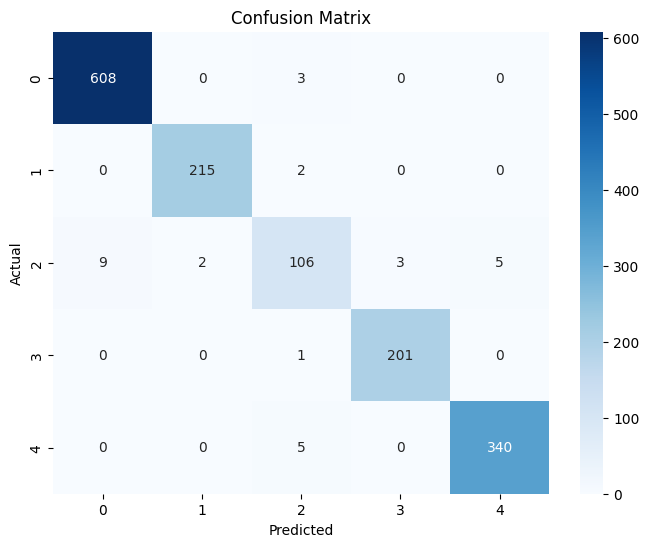

Rapport de classification:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       611
           1       0.99      0.99      0.99       217
           2       0.91      0.85      0.88       125
           3       0.99      1.00      0.99       202
           4       0.99      0.99      0.99       345

    accuracy                           0.98      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



In [39]:
model_other_in_green = model_predict_different_data(other_extract, green_labels)

### Analyse des Résultats : Other Data sur Green Clustering

- **Précision globale** : **98.07 %** – excellente performance.
- **Classes 0, 1, 2, et 4** : Très bien classées (recall ≥ 99 %, précision ≥ 99 %).
- **Classe 3** : Bonne mais moins performante (86 % de recall, 91 % de précision).

### Recommandations
- Classes globalement bien séparées.
- Améliorer la distinction pour la classe 3.
